#### Import libraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [149]:
df = pd.read_csv("uae_used_cars_10k.csv")

In [150]:
df.head()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...


##### 1- remove null values

In [151]:
df.isna().sum()

Make              0
Model             0
Year              0
Price             0
Mileage           0
Body Type         0
Cylinders       105
Transmission      0
Fuel Type         0
Color             0
Location          0
Description       0
dtype: int64

In [152]:
df.shape

(10000, 12)

In [153]:
df= df.dropna()

In [154]:
df.isna().sum()

Make            0
Model           0
Year            0
Price           0
Mileage         0
Body Type       0
Cylinders       0
Transmission    0
Fuel Type       0
Color           0
Location        0
Description     0
dtype: int64

In [155]:
df.shape

(9895, 12)

##### 2- check duplicates

In [156]:
df.duplicated().sum()

0

##### 3- Outlier detection


In [157]:
df["Price"].mean()

245334.4193026781

In [158]:
df["Price"].median()

101285.0

Note: The outliers here are normal since we have some expensive/luxuries cars

In [159]:
df["Make"].unique

<bound method Series.unique of 0              toyota
1                 kia
2                mini
3              nissan
4              toyota
            ...      
9994    mercedes-benz
9996             audi
9997           toyota
9998          peugeot
9999    mercedes-benz
Name: Make, Length: 9895, dtype: object>

#### 4. Feature Engineering

##### - Create Additional Features

4.1- Mileage: Distance driven in miles

In [160]:
df["Mileage"]

0       156500
1       169543
2       221583
3        69754
4        71399
         ...  
9994    226578
9996    258150
9997     80525
9998    288305
9999    283648
Name: Mileage, Length: 9895, dtype: int64

In [161]:
# convert Mileage to KM (1 mile = 1.60934 km)

df['Mileage'] = df['Mileage'] * 1.60934

df["Mileage"]

0       251861.71000
1       272852.33162
2       356602.38522
3       112257.90236
4       114905.26666
            ...     
9994    364641.03852
9996    415451.12100
9997    129592.10350
9998    463980.76870
9999    456486.07232
Name: Mileage, Length: 9895, dtype: float64

4.2- Price: Sale price in AED

In [162]:
df["Price"]

0        47819
1        61250
2        31861
3       110322
4       139994
         ...  
9994    219883
9996     80053
9997    183381
9998     40876
9999    150261
Name: Price, Length: 9895, dtype: int64

In [163]:
# convert AED to SAR

current_currency= 1.02

df["Price"]= df["Price"]*current_currency

df["Price"]

0        48775.38
1        62475.00
2        32498.22
3       112528.44
4       142793.88
          ...    
9994    224280.66
9996     81654.06
9997    187048.62
9998     41693.52
9999    153266.22
Name: Price, Length: 9895, dtype: float64

4.3- Description: Seller's description.


In [164]:
df["Description"].value_counts()


Description
2018 mercedes-benz s-class with Bluetooth, Rear camera, Leather seats. Condition: Engine repaired.          2
2014 mercedes-benz s-class with Navigation system, Adaptive cruise control. Condition: Repainted bumper.    2
2013 mercedes-benz e-class with Bluetooth, Navigation system, Sunroof. Condition: Dented door.              2
2021 mercedes-benz s-class with Bluetooth, Navigation system. Condition: Engine repaired.                   2
2024 nissan patrol with Bluetooth, Rear camera, Sunroof. Condition: Repainted bumper.                       2
                                                                                                           ..
2024 nissan maxima with Rear camera, Leather seats, Bluetooth, Sunroof. Condition: Dented door.             1
2012 chevrolet suburban with Bluetooth, Leather seats. Condition: Dented door.                              1
2019 ford focus with Navigation system, Adaptive cruise control, Leather seats. Condition: No damage.       

In [165]:
# Extract condition

df["Condition"] = df["Description"].str.extract(r'Condition: (.+)\.')
df["Condition"]

0        Engine repaired
1       Accident history
2        Engine repaired
3        Minor scratches
4            Dented door
              ...       
9994     Minor scratches
9996         Dented door
9997           No damage
9998     Minor scratches
9999    Accident history
Name: Condition, Length: 9895, dtype: object

In [166]:
df["Condition"].unique()

array(['Engine repaired', 'Accident history', 'Minor scratches',
       'Dented door', 'Repainted bumper', 'No damage'], dtype=object)

In [167]:
# Extract features

df["Features"] = df["Description"].str.extract(r'with (.+?)\. Condition:')
df["Features"]

0                              Rear camera, Leather seats
1       Sunroof, Adaptive cruise control, Rear camera,...
2       Adaptive cruise control, Rear camera, Sunroof,...
3                    Rear camera, Adaptive cruise control
4         Adaptive cruise control, Bluetooth, Rear camera
                              ...                        
9994        Sunroof, Rear camera, Adaptive cruise control
9996    Sunroof, Bluetooth, Rear camera, Navigation sy...
9997                 Rear camera, Adaptive cruise control
9998        Navigation system, Rear camera, Leather seats
9999                       Rear camera, Navigation system
Name: Features, Length: 9895, dtype: object

In [168]:
df["Features"].unique()

array(['Rear camera, Leather seats',
       'Sunroof, Adaptive cruise control, Rear camera, Bluetooth',
       'Adaptive cruise control, Rear camera, Sunroof, Bluetooth',
       'Rear camera, Adaptive cruise control',
       'Adaptive cruise control, Bluetooth, Rear camera',
       'Navigation system, Bluetooth, Sunroof, Adaptive cruise control',
       'Leather seats, Sunroof',
       'Rear camera, Adaptive cruise control, Leather seats',
       'Navigation system, Leather seats, Adaptive cruise control',
       'Sunroof, Leather seats', 'Leather seats, Adaptive cruise control',
       'Bluetooth, Sunroof, Adaptive cruise control',
       'Bluetooth, Sunroof, Navigation system, Leather seats',
       'Bluetooth, Rear camera, Sunroof',
       'Leather seats, Sunroof, Bluetooth, Adaptive cruise control',
       'Sunroof, Rear camera, Adaptive cruise control, Navigation system',
       'Adaptive cruise control, Rear camera, Bluetooth, Leather seats',
       'Leather seats, Adaptive cruis

In [169]:
# Extract features -> Rear camera

df["Rear_camera"] = df["Features"].apply(lambda x: 1 if "Rear camera" in str(x) else 0)

df["Rear_camera"].value_counts().sum()



9895

In [170]:
# Extract features -> Navigation system

df["Navigation_system"] = df["Features"].apply(lambda x: 1 if "Navigation system" in str(x) else 0)

df["Navigation_system"].value_counts().sum()


9895

In [171]:
# Extract features -> Leather seats

df["Leather_seats"] = df["Features"].apply(lambda x: 1 if "Leather seats" in str(x) else 0)

df["Leather_seats"].value_counts().sum()


9895

In [172]:
# Extract features -> Sunroof

df["Sunroof"] = df["Features"].apply(lambda x: 1 if "Sunroof" in str(x) else 0)

df["Sunroof"].value_counts().sum()


9895

In [173]:
# Extract features -> Cruise Control


# 1 = Adaptive , 0= Regular
df["cruise_control"] = df["Features"].apply(lambda x: 1 if "Adaptive cruise control" in str(x) else 0)

df["cruise_control"].value_counts().sum()


9895

In [174]:
# Extract features -> Bluetooth

df["Bluetooth"] = df["Features"].apply(lambda x: 1 if "Bluetooth" in str(x) else 0)

df["Bluetooth"].value_counts().sum()

9895

In [175]:
df = df.drop(["Features", "Description","Location"], axis=1)

In [176]:
df.head()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Condition,Rear_camera,Navigation_system,Leather_seats,Sunroof,cruise_control,Bluetooth
0,toyota,camry,2016,48775.38,251861.71000,Sedan,4,Automatic Transmission,Gasoline,Black,Engine repaired,1,0,1,0,0,0
1,kia,sorento,2013,62475.00,272852.33162,SUV,4,Automatic Transmission,Gasoline,Grey,Accident history,1,0,0,1,1,1
2,mini,cooper,2023,32498.22,356602.38522,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Engine repaired,1,0,0,1,1,1
3,nissan,altima,2016,112528.44,112257.90236,Sedan,4,Automatic Transmission,Gasoline,Red,Minor scratches,1,0,0,0,1,0
4,toyota,land-cruiser-76-series,2020,142793.88,114905.26666,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dented door,1,0,0,0,1,1


4.4- Cylinders: Number of engine cylinders

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9895 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9895 non-null   object 
 1   Model              9895 non-null   object 
 2   Year               9895 non-null   int64  
 3   Price              9895 non-null   float64
 4   Mileage            9895 non-null   float64
 5   Body Type          9895 non-null   object 
 6   Cylinders          9895 non-null   object 
 7   Transmission       9895 non-null   object 
 8   Fuel Type          9895 non-null   object 
 9   Color              9895 non-null   object 
 10  Condition          9895 non-null   object 
 11  Rear_camera        9895 non-null   int64  
 12  Navigation_system  9895 non-null   int64  
 13  Leather_seats      9895 non-null   int64  
 14  Sunroof            9895 non-null   int64  
 15  cruise_control     9895 non-null   int64  
 16  Bluetooth          9895 non-n

In [178]:
df["Cylinders"].value_counts()

Cylinders
6          3420
8          3003
4          2929
12          340
3            53
5            52
Unknown      50
10           48
Name: count, dtype: int64

In [179]:
df = df[df["Cylinders"] != "Unknown"]

In [180]:
df["Cylinders"] = pd.to_numeric(df["Cylinders"], errors='coerce')

df["Cylinders"].value_counts()

Cylinders
6     3420
8     3003
4     2929
12     340
3       53
5       52
10      48
Name: count, dtype: int64

##### - Encoding

split data

In [181]:
df_deleted = df.drop(columns=["Body Type", "Transmission", "Fuel Type", "Color", ])

In [182]:
df_deleted.head()

,Make,Model,Year,Price,Mileage,Cylinders,Condition,Rear_camera,Navigation_system,Leather_seats,Sunroof,cruise_control,Bluetooth
0,toyota,camry,2016,48775.38,251861.71000,4,Engine repaired,1,0,1,0,0,0
1,kia,sorento,2013,62475.00,272852.33162,4,Accident history,1,0,0,1,1,1
2,mini,cooper,2023,32498.22,356602.38522,4,Engine repaired,1,0,0,1,1,1
3,nissan,altima,2016,112528.44,112257.90236,4,Minor scratches,1,0,0,0,1,0
4,toyota,land-cruiser-76-series,2020,142793.88,114905.26666,4,Dented door,1,0,0,0,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

X = df_deleted.copy()

categorical_cols = ["Model", "Make", "Condition"]
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    with open(f"encoder_{col}.pkl", "wb") as f:
        pickle.dump(le, f)


In [184]:
X.head()

,Make,Model,Year,Price,Mileage,Cylinders,Condition,Rear_camera,Navigation_system,Leather_seats,Sunroof,cruise_control,Bluetooth
0,61,96,2016,48775.38,251861.71000,4,2,1,0,1,0,0,0
1,30,403,2013,62475.00,272852.33162,4,0,1,0,0,1,1,1
2,44,125,2023,32498.22,356602.38522,4,2,1,0,0,1,1,1
3,47,60,2016,112528.44,112257.90236,4,3,1,0,0,0,1,0
4,61,265,2020,142793.88,114905.26666,4,1,1,0,0,0,1,1


In [209]:
from sklearn.model_selection import train_test_split

y = df_deleted['Price']
Xx = X.drop(columns=["Price"])

X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=42)

Note: Since we used label encoding, we can't use models that consider ordinality.

### MODELING

In [210]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [211]:
# !pip install catboost

In [212]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn import metrics

model = CatBoostRegressor(
    iterations=250,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

model.fit(X_train, y_train)


0:	learn: 486179.1763777	total: 3.01ms	remaining: 749ms
100:	learn: 282752.7492420	total: 258ms	remaining: 380ms
200:	learn: 232190.6027714	total: 495ms	remaining: 121ms
249:	learn: 216256.4109037	total: 603ms	remaining: 0us


In [213]:
from sklearn import metrics

predict = model.predict(X_test)

r2 = metrics.r2_score(y_test, predict)
MAE = metrics.mean_absolute_error(y_test, predict)
MSE = metrics.mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)

print(f' The R2 score: {r2},\n Mean Absulate Error: {MAE},\n Mean Squared Error: {MSE},\n Root Mean Squared Error: {RMSE}')

 The R2 score: 0.6489077522685998,
 Mean Absulate Error: 129063.25380516877,
 Mean Squared Error: 53591634084.19189,
 Root Mean Squared Error: 231498.6697244541


In [214]:
X_train.head(1)

,Make,Model,Year,Mileage,Cylinders,Condition,Rear_camera,Navigation_system,Leather_seats,Sunroof,cruise_control,Bluetooth
9906,25,347,2009,55388.65478,6,1,1,1,1,1,0,0


In [215]:
train_predict = model.predict(X_train)


train_r2 = metrics.r2_score(y_train, train_predict)
train_MAE = metrics.mean_absolute_error(y_train, train_predict)
train_MSE = metrics.mean_squared_error(y_train, train_predict)
train_RMSE = np.sqrt(train_MSE)

# Print the results
print(f'Training Set Evaluation Metrics:')
print(f'R² score: {train_r2}')
print(f'Mean Absolute Error: {train_MAE}')
print(f'Mean Squared Error: {train_MSE}')
print(f'Root Mean Squared Error: {train_RMSE}')


Training Set Evaluation Metrics:
R² score: 0.8152484599828125
Mean Absolute Error: 115147.12283478543
Mean Squared Error: 46766835526.43618
Root Mean Squared Error: 216256.41152677112


In [216]:
# 📦 Save the trained model
import joblib
joblib.dump(model, "used_car_price_model_catboost.pkl")
print("Model saved as 'used_car_price_model.pkl'")

Model saved as 'used_car_price_model.pkl'


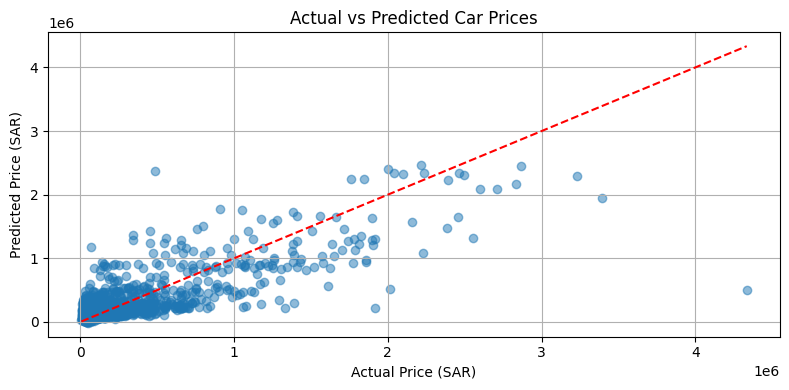

In [217]:
# 📊 Plot: Real vs Predicted Prices
plt.figure(figsize=(8, 4))
plt.scatter(y_test, predict, alpha=0.5)
plt.xlabel("Actual Price (SAR)")
plt.ylabel("Predicted Price (SAR)")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # reference line
plt.grid(True)
plt.tight_layout()
plt.show()


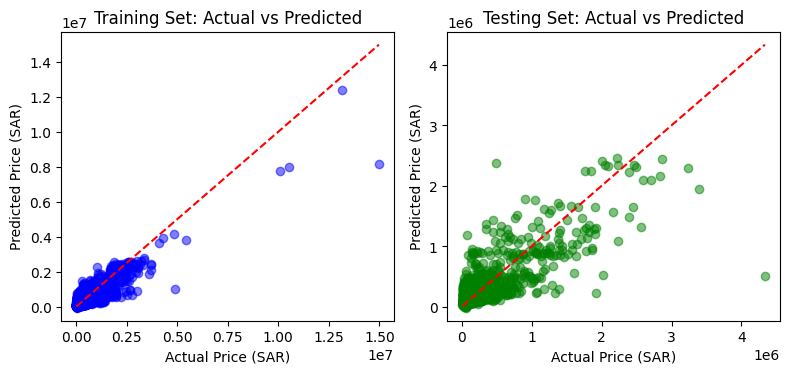

In [218]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_pred, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Price (SAR)")
plt.ylabel("Predicted Price (SAR)")
plt.title("Training Set: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (SAR)")
plt.ylabel("Predicted Price (SAR)")
plt.title("Testing Set: Actual vs Predicted")

plt.tight_layout()
plt.show()